In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Обрезка

In [3]:
# не перезапускать
with open('data/train/historical_transactions.csv', 'r') as rd:
    with open('data/train/historical_transactions_first_million.csv', 'a') as file:
        for idx in range(1000000):
            file.write(rd.readline())

In [2]:
df = pd.read_csv('data/train/historical_transactions_first_million.csv', header = 0)

In [3]:
df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [4]:
df.corr()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
city_id,1.000000,-0.039617,-0.082477,-0.026212,0.000307,0.095806,0.138438,0.045109
installments,-0.039617,1.000000,0.025986,0.012410,0.000367,0.011548,-0.064476,-0.048540
merchant_category_id,-0.082477,0.025986,1.000000,0.044238,0.001218,-0.048670,-0.112144,-0.020408
month_lag,-0.026212,0.012410,0.044238,1.000000,0.000537,0.001891,-0.028612,-0.004474
purchase_amount,0.000307,0.000367,0.001218,0.000537,1.000000,0.001532,-0.000608,-0.000594
category_2,0.095806,0.011548,-0.048670,0.001891,0.001532,1.000000,0.221698,0.020061
state_id,0.138438,-0.064476,-0.112144,-0.028612,-0.000608,0.221698,1.000000,0.091706
subsector_id,0.045109,-0.048540,-0.020408,-0.004474,-0.000594,0.020061,0.091706,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 14 columns):
authorized_flag         999999 non-null object
card_id                 999999 non-null object
city_id                 999999 non-null int64
category_1              999999 non-null object
installments            999999 non-null int64
category_3              996844 non-null object
merchant_category_id    999999 non-null int64
merchant_id             995888 non-null object
month_lag               999999 non-null int64
purchase_amount         999999 non-null float64
purchase_date           999999 non-null object
category_2              924638 non-null float64
state_id                999999 non-null int64
subsector_id            999999 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 106.8+ MB


In [7]:
df.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,924638.000000,999999.000000,999999.000000
mean,127.939606,0.501833,470.369870,-5.028483,-0.235406,2.186193,10.844765,27.506353
std,103.040876,1.968150,247.741802,3.684321,114.412968,1.540224,6.244132,9.527308
min,-1.000000,-1.000000,-1.000000,-13.000000,-0.746908,1.000000,-1.000000,-1.000000
25%,53.000000,0.000000,278.000000,-8.000000,-0.722024,1.000000,9.000000,19.000000
50%,88.000000,0.000000,437.000000,-4.000000,-0.693579,1.000000,9.000000,33.000000
75%,209.000000,1.000000,705.000000,-2.000000,-0.619633,3.000000,16.000000,34.000000
max,347.000000,999.000000,891.000000,0.000000,87155.460339,5.000000,24.000000,41.000000


In [11]:
df[df.category_3.isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
885,N,C_ID_fc8e41b9cf,251,N,-1,NaN,34,M_ID_c4f5972059,-1,-0.297615,2018-01-23 12:05:13,3.0,8,38
914,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,391,M_ID_bc5663de31,0,-0.393785,2018-02-21 07:24:59,3.0,8,7
936,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,307,M_ID_0f437c5559,-3,-0.475694,2017-11-13 00:00:00,3.0,8,19
941,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,222,M_ID_b7441bb10f,-1,-0.551563,2018-01-09 14:15:12,3.0,8,21
965,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,514,M_ID_1dd8347bcb,-1,-0.114893,2018-01-23 14:04:39,3.0,8,9
992,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,414,M_ID_d12eaa9bd7,-3,0.421809,2017-11-27 00:00:00,3.0,8,29
1003,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,367,M_ID_b39aa08d22,-2,-0.538791,2017-12-05 11:32:24,3.0,8,16
1031,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,422,M_ID_944c5bc932,-1,-0.611669,2018-01-06 10:40:46,3.0,8,27
1035,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,506,M_ID_4838a2855e,-2,-0.521510,2017-12-06 10:58:34,3.0,8,30
2329,Y,C_ID_058b254a5b,233,N,-1,NaN,68,M_ID_a225855c6f,-2,-0.581616,2017-12-16 10:06:39,1.0,9,27


# Группировка

In [5]:
df_tr = pd.read_csv('data/train/train.csv', header = 0)

In [6]:
df_tr.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
gdf = df.groupby("card_id")

In [7]:
gdf["purchase_amount"].size()

card_id
C_ID_002198cdf1     95
C_ID_002780b4cf     54
C_ID_002fc2a163     57
C_ID_0032aebb26    353
C_ID_0037be6c74    617
C_ID_003839dd44    229
C_ID_0039c126cb     46
C_ID_0046db9f8a    150
C_ID_004caeab1b    540
C_ID_00622d64b0     43
C_ID_00727b1b66     13
C_ID_007eaf8be8    470
C_ID_0089879d9e    355
C_ID_00960749ed     85
C_ID_0096393955    246
C_ID_009b5a197b     19
C_ID_009f7fc2e7     98
C_ID_00a2ac940d    149
C_ID_00aed1b3a4     39
C_ID_00afd0d796     64
C_ID_00bab3933f    283
C_ID_00c4e6c660    336
C_ID_00fc4aa661    996
C_ID_010d3fc2c0    320
C_ID_0110bce33f    392
C_ID_011780608d    148
C_ID_011b0d9794     27
C_ID_011fdf8b60    146
C_ID_013bab6f35     22
C_ID_0145988f58    710
                  ... 
C_ID_fe690a4999    109
C_ID_fe81f4e5a3    312
C_ID_fe829a2813    153
C_ID_fe8e4ebf94     64
C_ID_fe907b57b7    366
C_ID_fe968b5384     11
C_ID_fe97da1633     77
C_ID_fe9cc9b65d     34
C_ID_fe9d8d1b6e    154
C_ID_fea1acc217    698
C_ID_fea6079294     47
C_ID_feaacc0f2e    231
C_I

In [9]:
gdf = gdf["purchase_amount"].size().reset_index()

In [22]:
gdf.head()

,card_id,purchase_amount
0,C_ID_002198cdf1,95
1,C_ID_002780b4cf,54
2,C_ID_002fc2a163,57
3,C_ID_0032aebb26,353
4,C_ID_0037be6c74,617


In [10]:
gdf.columns = ["card_id", "num_hist_transactions"]
df_tr = pd.merge(df_tr, gdf, on="card_id", how="left")

In [11]:
df_tr.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transactions
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,NaN
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,NaN
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,NaN
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,NaN
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,NaN


In [26]:
df_tr[df_tr.num_hist_transactions.isnull()]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transactions
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,NaN
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,NaN
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,NaN
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,NaN
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,NaN
5,2016-09,C_ID_0894217f2f,4,2,0,0.871585,NaN
6,2016-12,C_ID_7e63323c00,3,2,1,0.230129,NaN
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850,NaN
8,2017-08,C_ID_fe0fdac8ea,2,1,0,-0.065406,NaN
9,2016-08,C_ID_bf62c0b49d,2,2,0,0.300062,NaN


**Появились NaN т.к. тут только часть дата-сета**

In [12]:
df_tr = df_tr[df_tr.num_hist_transactions.notnull()]

In [13]:
df_tr.head().reset_index()

,index,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transactions
0,72,2016-11,C_ID_a46cd7043f,5,2,1,-0.409381,233.0
1,101,2017-01,C_ID_95c97b86ff,2,1,0,-0.898370,23.0
2,192,2017-03,C_ID_ce1648c459,3,2,1,0.219868,338.0
3,228,2017-11,C_ID_323f262c07,4,1,0,0.626562,65.0
4,317,2017-05,C_ID_021e5894cc,2,1,0,0.074381,479.0


In [14]:
df_tr = df_tr.reset_index().iloc[:, 1:]

In [15]:
df_tr.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transactions
0,2016-11,C_ID_a46cd7043f,5,2,1,-0.409381,233.0
1,2017-01,C_ID_95c97b86ff,2,1,0,-0.898370,23.0
2,2017-03,C_ID_ce1648c459,3,2,1,0.219868,338.0
3,2017-11,C_ID_323f262c07,4,1,0,0.626562,65.0
4,2017-05,C_ID_021e5894cc,2,1,0,0.074381,479.0


# Проверка метода size()

In [8]:
df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [9]:
df_by_1_id = df[df.card_id == 'C_ID_4e6213e9bc']

In [12]:
df_by_1_id.shape

(400, 14)

In [13]:
df_by_1_id.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [14]:
df_by_1_id.purchase_amount.describe()

count    400.000000
mean      -0.726847
std        0.028892
min       -0.745405
25%       -0.737892
50%       -0.734135
75%       -0.724368
max       -0.249230
Name: purchase_amount, dtype: float64

In [15]:
gr_df = df_by_1_id.groupby('card_id')

In [17]:
gr_df.size()

card_id
C_ID_4e6213e9bc    400
dtype: int64

In [20]:
gr_df.sum()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
card_id,,,,,,,,
C_ID_4e6213e9bc,38082,0,133080,-2429,-290.73866,384.0,5862,13626


In [ ]:
#группировка новых фич
s = df_hist.groupby('card_id').agg({'purchase_amount': ['min', 'max', 'mean', 'median', 'std', 'size'], 'month_lag': ['min', 'mean', 'median', 'std']})

# Букетинг

In [16]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
df_tr['binned_num_hist_transactions'] = pd.cut(df_tr['num_hist_transactions'], bins)

In [17]:
df_tr.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transactions,binned_num_hist_transactions
0,2016-11,C_ID_a46cd7043f,5,2,1,-0.409381,233.0,"(200, 500]"
1,2017-01,C_ID_95c97b86ff,2,1,0,-0.898370,23.0,"(20, 30]"
2,2017-03,C_ID_ce1648c459,3,2,1,0.219868,338.0,"(200, 500]"
3,2017-11,C_ID_323f262c07,4,1,0,0.626562,65.0,"(50, 75]"
4,2017-05,C_ID_021e5894cc,2,1,0,0.074381,479.0,"(200, 500]"


In [41]:
cnt_srs = df_tr.groupby("binned_num_hist_transactions")['target'].mean() # для построения желтого графика

In [42]:
cnt_srs

binned_num_hist_transactions
(0, 10]         0.668389
(10, 20]       -0.396626
(20, 30]        0.004195
(30, 40]       -0.196569
(40, 50]        0.237456
(50, 75]       -1.102380
(75, 100]      -0.808800
(100, 150]     -0.627490
(150, 200]     -0.253784
(200, 500]     -0.478170
(500, 10000]   -0.253157
Name: target, dtype: float64

In [22]:
df_tr_sorted = df_tr.sort_values(by='num_hist_transactions')

In [35]:
df_tr_sorted.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_hist_transactions,binned_num_hist_transactions
2797,2017-04,C_ID_5410ce4827,4,1,0,-0.609531,7.0,"(0, 10]"
1442,2017-10,C_ID_a22de71ac8,3,1,1,0.892741,8.0,"(0, 10]"
498,2015-11,C_ID_b8767dff55,3,1,1,0.780530,8.0,"(0, 10]"
2477,2017-11,C_ID_4bcb5b8939,2,2,0,-0.134834,8.0,"(0, 10]"
579,2016-02,C_ID_040471cd40,5,1,1,-1.180004,9.0,"(0, 10]"


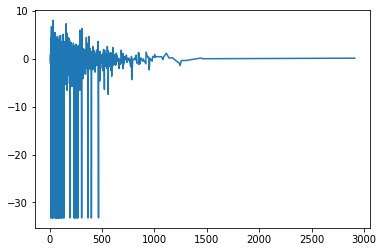

In [27]:
plt.plot(df_tr_sorted.num_hist_transactions, df_tr_sorted.target)

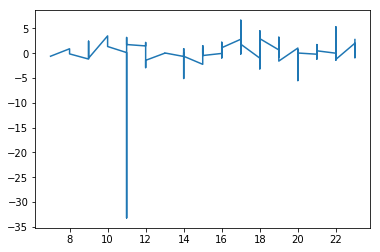

In [31]:
# укрупним диапазон 0-100
plt.plot(df_tr_sorted.head(100).num_hist_transactions, df_tr_sorted.head(100).target)

In [34]:
df_tr.corr()

,feature_1,feature_2,feature_3,target,num_hist_transactions
feature_1,1.000000,-0.099350,0.607882,0.013408,0.050112
feature_2,-0.099350,1.000000,0.059206,0.046982,0.033342
feature_3,0.607882,0.059206,1.000000,-0.003332,-0.024843
target,0.013408,0.046982,-0.003332,1.000000,0.023256
num_hist_transactions,0.050112,0.033342,-0.024843,0.023256,1.000000


In [ ]:
# не исполнялось
gdf = df.groupby("card_id")
gdf = gdf["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index() # аналогично size()
gdf.columns = ["card_id", "sum_hist_trans", "mean_hist_trans", "std_hist_trans", "min_hist_trans", "max_hist_trans"]
tr_df = pd.merge(tr_df, gdf, on="card_id", how="left")

In [ ]:
# Дальше биннинг по персентилю